### Loading data

In [2]:
import pandas as pd

df = pd.read_csv('../data/CosciaRios2012_DataBase.csv')
df.head()

,Code,State,Year,Beltran_Leyva,Beltran_Leyva_Family,Familia,Golfo,Juarez,Sinaloa,Sinaloa_Family,Tijuana,Zetas,Otros
0,1001,1,1990,0,0,0,0,0,0,0,0,0,0
1,1001,1,1991,0,0,0,0,0,0,0,0,0,0
2,1001,1,1992,0,0,0,0,0,0,0,0,0,0
3,1001,1,1993,0,0,0,0,0,0,0,0,0,0
4,1001,1,1994,0,0,0,0,0,0,0,0,0,0


### Number of municipalities in total

In [2]:
# Find the number of unique codes
unique_codes_count = df['Code'].nunique()
print(f"Number of unique codes: {unique_codes_count}")

Number of unique codes: 2457


### Family names

In [12]:
# Count number of columns from 4th column onward and show their names
start_col = 3  # column index 4 (0-based)
family_cols = df.columns[start_col:]
num_family_cols = len(family_cols)
print(f"Number of columns from 4th onward: {num_family_cols}")
print("Column names:", list(family_cols))

Number of columns from 4th onward: 10
Column names: ['Beltran_Leyva', 'Beltran_Leyva_Family', 'Familia', 'Golfo', 'Juarez', 'Sinaloa', 'Sinaloa_Family', 'Tijuana', 'Zetas', 'Otros']


### Number of isolated nodes across all years: 765
That is, municipalities that never showed any activity

In [4]:
# Count unique codes with non-zero and zero rows from column 5 onward (since column 4 is index)
start_col = 3  
family_cols = df.columns[start_col:]

# For each code, check if all family columns are zero in all its rows
code_groups = df.groupby('Code')[family_cols]
zero_mask = code_groups.apply(lambda x: (x == 0).all(axis=1).all())
num_zero_codes = zero_mask.sum()
num_nonzero_codes = len(zero_mask) - num_zero_codes
print(f"Number of unique codes with only zero rows: {num_zero_codes}")
print(f"Number of unique codes with non-zero rows: {num_nonzero_codes}")
print(f"Number of total codes: {num_nonzero_codes + num_zero_codes}")

Number of unique codes with only zero rows: 1692
Number of unique codes with non-zero rows: 765
Number of total codes: 2457


### Year 2010 has 709 non-isolated nodes and is missing data about one municipality

In [9]:
# Find the max year
max_year = df['Year'].max()

# Select rows for the max year
max_year_df = df[df['Year'] == max_year]

# Check if columns 4 to 13 (by position) are all 0s for each row
empty_codes = (max_year_df.iloc[:, 3:13] == 0).all(axis=1)

# Check if columns 4 to 13 (by position) have at least one non-zero value for each row (meaning at least family present)
non_empty_codes = (max_year_df.iloc[:, 3:13] == 1).any(axis=1)

# Count empty codes and total codes in max year
num_empty_codes = empty_codes.sum()
total_codes = max_year_df['Code'].nunique()

print(f"Isolated municipalities in {max_year}: {num_empty_codes}")
print(f"Non-isolated municipalities in {max_year}: {non_empty_codes.sum()}")
print(f"Total municipalities in {max_year}: {total_codes}")

Isolated municipalities in 2010: 1747
Non-isolated municipalities in 2010: 709
Total municipalities in 2010: 2456


In [21]:
max_year_df

,Code,State,Year,Beltran_Leyva,Beltran_Leyva_Family,Familia,Golfo,Juarez,Sinaloa,Sinaloa_Family,Tijuana,Zetas,Otros
20,1001,1,2010,0,0,1,0,1,0,0,0,1,0
41,1002,1,2010,0,0,1,0,0,1,0,0,0,0
62,1003,1,2010,0,0,0,0,0,0,0,0,1,0
83,1004,1,2010,0,0,0,0,0,0,0,0,0,0
104,1005,1,2010,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51491,32053,32,2010,0,0,0,0,0,0,0,0,0,0
51512,32054,32,2010,0,0,0,0,0,0,0,0,0,0
51533,32055,32,2010,0,0,0,0,0,0,0,0,1,0
51554,32056,32,2010,0,0,1,1,0,1,0,0,1,0


### Checking which municipalities are skipped in each year to assess possible dropping of rows

In [3]:
df['Year'].value_counts()

Year
1990    2457
2001    2457
2009    2457
2008    2457
2007    2457
2006    2457
2005    2457
2004    2457
2003    2457
2002    2457
2000    2457
1991    2457
1999    2457
1998    2457
1997    2457
1996    2457
1995    2457
1994    2457
1993    2457
1992    2457
2010    2456
Name: count, dtype: int64

In [13]:
unique_codes = set(df['Code'].unique())

for year in range(df['Year'].min(), df['Year'].max() + 1):
    year_codes = set(df[df['Year'] == year]['Code'].unique())
    missing_codes = unique_codes - year_codes
    print(f"Year {year} is missing {len(missing_codes)} codes: {missing_codes}")

Year 1990 is missing 0 codes: set()
Year 1991 is missing 0 codes: set()
Year 1992 is missing 0 codes: set()
Year 1993 is missing 0 codes: set()
Year 1994 is missing 0 codes: set()
Year 1995 is missing 0 codes: set()
Year 1996 is missing 0 codes: set()
Year 1997 is missing 0 codes: set()
Year 1998 is missing 0 codes: set()
Year 1999 is missing 0 codes: set()
Year 2000 is missing 0 codes: set()
Year 2001 is missing 0 codes: set()
Year 2002 is missing 0 codes: set()
Year 2003 is missing 0 codes: set()
Year 2004 is missing 0 codes: set()
Year 2005 is missing 0 codes: set()
Year 2006 is missing 0 codes: set()
Year 2007 is missing 0 codes: set()
Year 2008 is missing 0 codes: set()
Year 2009 is missing 0 codes: set()
Year 2010 is missing 1 codes: {32058}


After observing only year 2010 is missing data about a single municipality, we decide to ignore this and keep working with the data we have

### Checking relevance of each family in each municipality across all 20 years
Municipalities ordered by total appearances of all families across 20 years, there are candidates for potentially dangerous municipalities

In [16]:
# For each column from column 4 onward, count number of times the column has 1 in each code through all years
start_col = 3  # column index 4 (0-based)
family_cols = df.columns[start_col:]

# Count number of times each family column has 1 for each code
counts = {}
for col in family_cols:
    counts[col] = df[df[col] == 1].groupby('Code').size()

# Convert to DataFrame for easier viewing
counts_df = pd.DataFrame(counts).fillna(0).astype(int)
counts_df['total'] = counts_df.sum(axis=1)
counts_df_sorted = counts_df.sort_values('total', ascending=False)
counts_df_sorted

,Beltran_Leyva,Beltran_Leyva_Family,Familia,Golfo,Juarez,Sinaloa,Sinaloa_Family,Tijuana,Zetas,Otros,total
Code,,,,,,,,,,,
25017,7,2,2,4,8,15,0,1,2,3,44
19039,3,4,1,12,3,8,0,2,7,3,43
8019,0,1,0,4,13,9,5,3,5,1,41
2004,0,0,1,3,2,7,5,16,0,6,40
8037,4,2,2,5,7,7,2,6,1,3,39
...,...,...,...,...,...,...,...,...,...,...,...
12060,0,0,0,0,0,0,0,0,0,1,1
16011,0,0,1,0,0,0,0,0,0,0,1
16012,0,0,1,0,0,0,0,0,0,0,1


### Checking number of families across all years in each municipality

In [24]:
# For each municipality (Code), count how many families are present (nonzero in any year for each family column)
start_col = 3  # column index 4 (0-based)
family_cols = df.columns[start_col:]

# For each code, check across all years if any row for a family column is nonzero
families_present = df.groupby('Code')[family_cols].apply(lambda x: (x != 0).any(axis=0))

# Sum across families for each code to get the number of families present in each municipality
num_families_per_code = families_present.sum(axis=1)

# Show the result as a DataFrame
num_families_per_code_df = num_families_per_code.reset_index().rename(columns={0: 'NumFamiliesPresent'}) #setting as a df since it was a series
num_families_per_code_df.sort_values('NumFamiliesPresent', ascending=False)

,Code,NumFamiliesPresent
270,9007,10
366,12001,10
285,10005,10
234,8037,10
1681,21114,10
...,...,...
1156,20159,0
1155,20158,0
1154,20157,0
1153,20156,0


### Frequency distribution of municipalities by how many distinct families are present across all years

In [34]:
num_families_per_code.value_counts()

0     1692
1      175
2      174
3      173
4       67
5       63
6       47
7       24
8       22
9       15
10       5
Name: count, dtype: int64

### Number of total appearances per family
Repeated appearances in the same municipality are also counted

In [42]:
# Calculate the sum of each column in counts_df
column_sums = counts_df.sum(axis=0)
print(column_sums)

Beltran_Leyva            588
Beltran_Leyva_Family     154
Familia                  644
Golfo                   1320
Juarez                   421
Sinaloa                  874
Sinaloa_Family           153
Tijuana                  316
Zetas                   1587
Otros                    171
total                   6228
dtype: int64


### Number of unique municipalities each family is present in

In [43]:
# Count number of codes for each column in counts_df that are not zero
nonzero_code_counts = (counts_df != 0).sum(axis=0)
print(nonzero_code_counts)

Beltran_Leyva           282
Beltran_Leyva_Family     86
Familia                 308
Golfo                   438
Juarez                  151
Sinaloa                 307
Sinaloa_Family           78
Tijuana                 115
Zetas                   585
Otros                    86
total                   765
dtype: int64


### Distribution comparison: total appearances vs municipalities per family

We compare two per-family distributions:
- `column_sums`: total number of appearances across all municipalities and years.
- `nonzero_code_counts`: number of municipalities where the family appears at least once.

To visually assess similarity, both bar charts use the same x-axis order (families sorted by total appearances). If the shapes look similar and the correlation is high, the two measures likely track each other.

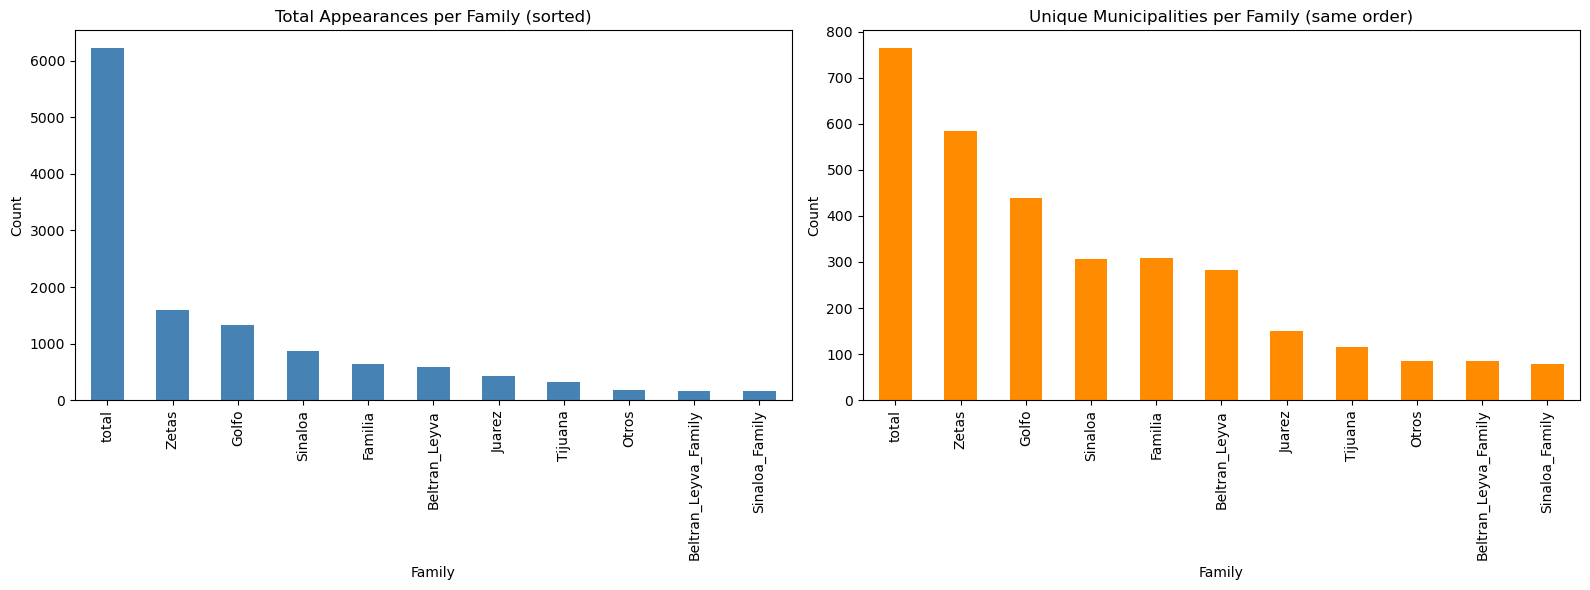

Pearson correlation between measures: 0.859


In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Build aligned comparison by family
comparison_df = pd.DataFrame({
    'TotalAppearances': column_sums,
    'MunicipalityCount': nonzero_code_counts
})

# Use the same x-order (families) sorted by total appearances
order = comparison_df['TotalAppearances'].sort_values(ascending=False).index
ordered_totals = comparison_df.loc[order, 'TotalAppearances']
ordered_munis = comparison_df.loc[order, 'MunicipalityCount']

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)
ordered_totals.plot(kind='bar', ax=axes[0], color='steelblue', title='Total Appearances per Family (sorted)')
axes[0].set_xlabel('Family')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

ordered_munis.plot(kind='bar', ax=axes[1], color='darkorange', title='Unique Municipalities per Family (same order)')
axes[1].set_xlabel('Family')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# Optional quick metric to quantify similarity
corr = comparison_df['TotalAppearances'].corr(comparison_df['MunicipalityCount'])
print(f'Pearson correlation between measures: {corr:.3f}')

From here, we observe that no family relevancee is inflated due to repeated appearance in the same municipality in all years, but its participation in municipalities is consistent 